In [43]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd 

In [44]:
april = pd.read_csv("April sleep data - Sheet1.csv")
april.sample(6)

,APRIL,DATE,SLEEP SCORE,HOURS OF SLEEP,REM SLEEP,DEEP SLEEP,HEART RATE BELOW RESTING,SLEEP TIME
3,Monday,04/04/2022,83,6:50:00,17.00%,19.00%,99.00%,10:12pm - 5:49am
24,Monday,04/25/2022,84,7:39:00,16.00%,20.00%,70.00%,9:52pm - 6:55am
27,Thursday,04/28/2022,87,6:54:00,21.00%,22.00%,90.00%,10:02pm - 5:46am
0,Friday,04/01/2022,90,7:22:00,18.00%,21.00%,98.00%,9:49pm - 6:01am
1,Saturday,04/02/2022,89,8:40:00,21.00%,21.00%,73.00%,9:50pm - 7:26am
13,Thursday,04/14/2022,83,7:19:00,19.00%,23.00%,77.00%,9:35pm - 5:58am


In [45]:
april.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   APRIL                     30 non-null     object
 1   DATE                      30 non-null     object
 2   SLEEP SCORE               30 non-null     int64 
 3   HOURS OF SLEEP            30 non-null     object
 4   REM SLEEP                 30 non-null     object
 5   DEEP SLEEP                30 non-null     object
 6   HEART RATE BELOW RESTING  30 non-null     object
 7   SLEEP TIME                30 non-null     object
dtypes: int64(1), object(7)
memory usage: 2.0+ KB


In [46]:
#convert Date column into dateobject datatype
april['DATE'] = pd.to_datetime(april['DATE'])

In [47]:
april.head(3)

,APRIL,DATE,SLEEP SCORE,HOURS OF SLEEP,REM SLEEP,DEEP SLEEP,HEART RATE BELOW RESTING,SLEEP TIME
0,Friday,2022-04-01,90,7:22:00,18.00%,21.00%,98.00%,9:49pm - 6:01am
1,Saturday,2022-04-02,89,8:40:00,21.00%,21.00%,73.00%,9:50pm - 7:26am
2,Sunday,2022-04-03,81,8:52:00,21.00%,17.00%,26.00%,11:29pm - 9:54am


In [48]:
april['date_month'] = april['DATE'].dt.month_name()
april['date_year'] = april['DATE'].dt.year

In [49]:
april.head(3)

,APRIL,DATE,SLEEP SCORE,HOURS OF SLEEP,REM SLEEP,DEEP SLEEP,HEART RATE BELOW RESTING,SLEEP TIME,date_month,date_year
0,Friday,2022-04-01,90,7:22:00,18.00%,21.00%,98.00%,9:49pm - 6:01am,April,2022
1,Saturday,2022-04-02,89,8:40:00,21.00%,21.00%,73.00%,9:50pm - 7:26am,April,2022
2,Sunday,2022-04-03,81,8:52:00,21.00%,17.00%,26.00%,11:29pm - 9:54am,April,2022


In [50]:
april['HOURS OF SLEEP'] = pd.to_datetime(april['HOURS OF SLEEP'])
april.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   APRIL                     30 non-null     object        
 1   DATE                      30 non-null     datetime64[ns]
 2   SLEEP SCORE               30 non-null     int64         
 3   HOURS OF SLEEP            30 non-null     datetime64[ns]
 4   REM SLEEP                 30 non-null     object        
 5   DEEP SLEEP                30 non-null     object        
 6   HEART RATE BELOW RESTING  30 non-null     object        
 7   SLEEP TIME                30 non-null     object        
 8   date_month                30 non-null     object        
 9   date_year                 30 non-null     int32         
dtypes: datetime64[ns](2), int32(1), int64(1), object(6)
memory usage: 2.4+ KB


In [54]:
#now we extract hours and minutes
april['HOURS'] = april['HOURS OF SLEEP'].dt.hour
april['MINUTES'] = april['HOURS OF SLEEP'].dt.minute
april['Total_minutes'] = (april['HOURS']*60)+april['MINUTES']
april.head()

,APRIL,DATE,SLEEP SCORE,HOURS OF SLEEP,REM SLEEP,DEEP SLEEP,HEART RATE BELOW RESTING,SLEEP TIME,date_month,date_year,HOURS,MINUTES,Total_minutes
0,Friday,2022-04-01,90,2024-04-16 07:22:00,18.00%,21.00%,98.00%,9:49pm - 6:01am,April,2022,7,22,442
1,Saturday,2022-04-02,89,2024-04-16 08:40:00,21.00%,21.00%,73.00%,9:50pm - 7:26am,April,2022,8,40,520
2,Sunday,2022-04-03,81,2024-04-16 08:52:00,21.00%,17.00%,26.00%,11:29pm - 9:54am,April,2022,8,52,532
3,Monday,2022-04-04,83,2024-04-16 06:50:00,17.00%,19.00%,99.00%,10:12pm - 5:49am,April,2022,6,50,410
4,Tuesday,2022-04-05,84,2024-04-16 06:57:00,18.00%,21.00%,97.00%,9:45pm - 5:43am,April,2022,6,57,417


In [55]:
april.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   APRIL                     30 non-null     object        
 1   DATE                      30 non-null     datetime64[ns]
 2   SLEEP SCORE               30 non-null     int64         
 3   HOURS OF SLEEP            30 non-null     datetime64[ns]
 4   REM SLEEP                 30 non-null     object        
 5   DEEP SLEEP                30 non-null     object        
 6   HEART RATE BELOW RESTING  30 non-null     object        
 7   SLEEP TIME                30 non-null     object        
 8   date_month                30 non-null     object        
 9   date_year                 30 non-null     int32         
 10  HOURS                     30 non-null     int32         
 11  MINUTES                   30 non-null     int32         
 12  Total_minutes           

In [56]:
april[['DATE','Total_minutes']]


,DATE,Total_minutes
0,2022-04-01,442
1,2022-04-02,520
2,2022-04-03,532
3,2022-04-04,410
4,2022-04-05,417
5,2022-04-06,447
6,2022-04-07,477
7,2022-04-08,447
8,2022-04-09,492
9,2022-04-10,417


In [64]:
x = april['DATE'].values
y = april['Total_minutes'].values

In [65]:
y.dtype

dtype('int32')

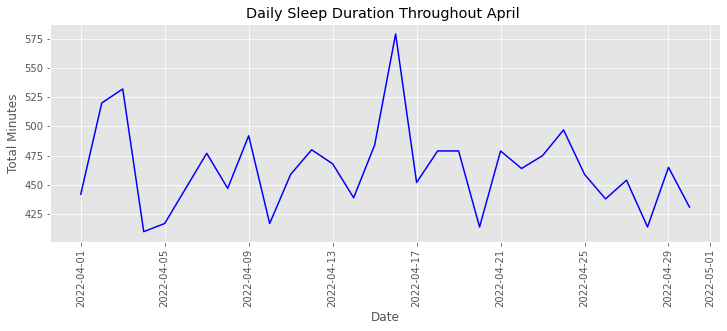

In [73]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))
plt.style.use('ggplot')
plt.plot(x,y,color='b')
plt.title("Daily Sleep Duration Throughout April ")
plt.ylabel('Total Minutes')
plt.xlabel('Date')
plt.xticks(rotation = 90)
plt.show()